fetching data

In [1]:
import requests
import pandas as pd

def fetch_data(symbol, indicator, api_key):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': indicator,
        'symbol': symbol,
        'interval': '5min',  # You can adjust this for different time intervals
        'apikey': api_key
    }
    response = requests.get(url, params=params)
    
    # Check for a successful API call
    if response.status_code == 200:
        data = response.json()
        
        # Ensure the expected data is in the response
        if 'Time Series (5min)' in data:
            # Extract the time series data
            df = pd.DataFrame.from_dict(data['Time Series (5min)'], orient='index')
            df = df.rename(columns={
                '1. open': 'open',
                '2. high': 'high',
                '3. low': 'low',
                '4. close': 'close',
                '5. volume': 'volume'
            })
            df.index = pd.to_datetime(df.index)  # Convert the index to datetime
            return df
        else:
            print("Error: No data found for this symbol.")
            return None
    else:
        print("Error: Failed to retrieve data.")
        return None

# Example: Fetching 5-minute intraday data for AAPL
api_key = 'NNIVHEQ1P9381USE'  # Your API key
symbol = 'AAPL'

data = fetch_data(symbol, 'TIME_SERIES_INTRADAY', api_key)
if data is not None:
    print(data.head(100))

                         open      high       low     close  volume
2024-11-07 19:55:00  227.5300  227.7000  227.4800  227.7000    3637
2024-11-07 19:50:00  227.5300  227.6600  227.4800  227.5785    3748
2024-11-07 19:45:00  227.6299  227.6600  227.5200  227.6300    2106
2024-11-07 19:40:00  227.6150  227.6600  227.5200  227.6300    2608
2024-11-07 19:35:00  227.7000  227.7000  227.5000  227.5800    1574
...                       ...       ...       ...       ...     ...
2024-11-07 12:00:00  227.0620  227.1099  226.7600  227.0200  288260
2024-11-07 11:55:00  226.9000  227.1000  226.8400  227.0700  417977
2024-11-07 11:50:00  226.7150  226.9400  226.7000  226.9050  299430
2024-11-07 11:45:00  226.3900  226.7300  226.3900  226.7100  423286
2024-11-07 11:40:00  226.2851  226.4400  226.2300  226.3800  220716

[100 rows x 5 columns]


cleaning data

In [9]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(symbol, indicator, api_key):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': indicator,
        'symbol': symbol,
        'interval': '5min',  #  can adjust this for different time intervals
        'apikey': api_key
    }
    response = requests.get(url, params=params)
    
    # Check for a successful API call
    if response.status_code == 200:
        data = response.json()
        
        # Ensure the expected data is in the response
        if 'Time Series (5min)' in data:
            # Extract the time series data
            df = pd.DataFrame.from_dict(data['Time Series (5min)'], orient='index')
            df = df.rename(columns={
                '1. open': 'open',
                '2. high': 'high',
                '3. low': 'low',
                '4. close': 'close',
                '5. volume': 'volume'
            })
            df.index = pd.to_datetime(df.index)  # Convert the index to datetime
            df = df.astype(float)  # Ensure numeric data type for calculations
            return df
        else:
            print("Error: No data found for this symbol.")
            return None
    else:
        print("Error: Failed to retrieve data.")
        return None

# Fetch data for AAPL
api_key = 'NNIVHEQ1P9381USE'  # Your API key
symbol = 'AAPL'
data = fetch_data(symbol, 'TIME_SERIES_INTRADAY', api_key)

if data is not None:
    # 1. Check for missing values
    print("Missing values in the data:")
    print(data.isna().sum())  # Count missing values in each column
    
    # 2. Handle missing values (e.g., forward fill or drop rows with missing data)
    data = data.fillna(method='ffill')  # Forward fill missing values

    
    # 3. correct data types (convert columns to float if needed)
    data = data.astype(float)  
    
    # 4. Check for duplicates based on the index (timestamp)
    data = data[~data.index.duplicated(keep='last')]  # Keep the last occurrence
    
    # 5. Resample data (if needed)
   
    # Uncomment the following line if you want to resample:
    # data_resampled = data.resample('15T').last()  # Resample to 15-minute intervals
    
    # 6. Sort data by the index (timestamp)
    data = data.sort_index()  # Ensure data is sorted by timestamp
    
    # 7. Display cleaned data
    print("Cleaned data:")
    print(data.head())  # Display the first few rows of the cleaned data

Missing values in the data:
open      0
high      0
low       0
close     0
volume    0
dtype: int64
Cleaned data:
                         open      high     low    close    volume
2024-11-07 11:40:00  226.2851  226.4400  226.23  226.380  220716.0
2024-11-07 11:45:00  226.3900  226.7300  226.39  226.710  423286.0
2024-11-07 11:50:00  226.7150  226.9400  226.70  226.905  299430.0
2024-11-07 11:55:00  226.9000  227.1000  226.84  227.070  417977.0
2024-11-07 12:00:00  227.0620  227.1099  226.76  227.020  288260.0


C:\Users\raman\AppData\Local\Temp\ipykernel_30860\3660397760.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values


Insight_1

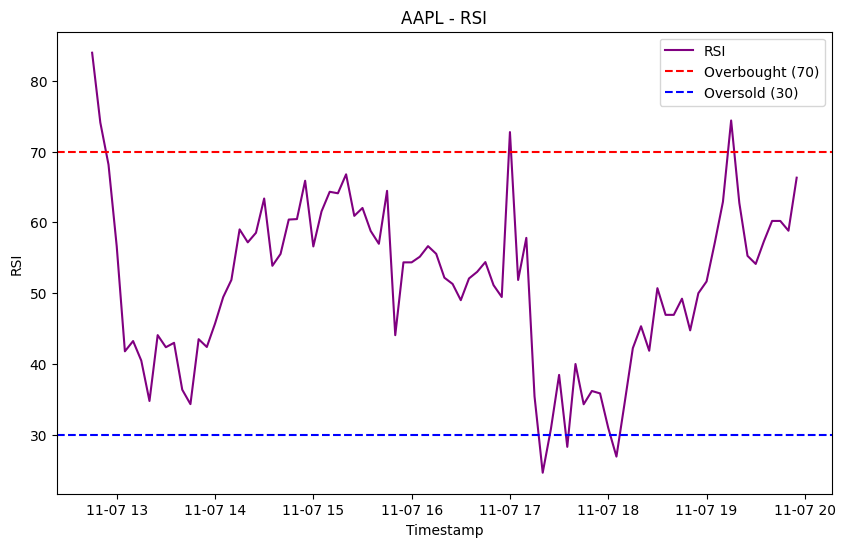

RSI (66.31) is neutral. No immediate action required.


In [5]:
# Function to calculate RSI
def compute_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for the given data
data['RSI'] = compute_rsi(data)

# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
plt.title(f'{symbol} - RSI')
plt.xlabel('Timestamp')
plt.ylabel('RSI')
plt.legend()
plt.show()

# RSI Insight: Overbought or Oversold
if data['RSI'].iloc[-1] > 70:
    print(f"RSI ({data['RSI'].iloc[-1]:.2f}) indicates an Overbought condition. Consider selling or holding off.")
elif data['RSI'].iloc[-1] < 30:
    print(f"RSI ({data['RSI'].iloc[-1]:.2f}) indicates an Oversold condition. Consider buying.")
else:
    print(f"RSI ({data['RSI'].iloc[-1]:.2f}) is neutral. No immediate action required.")


Insight_2

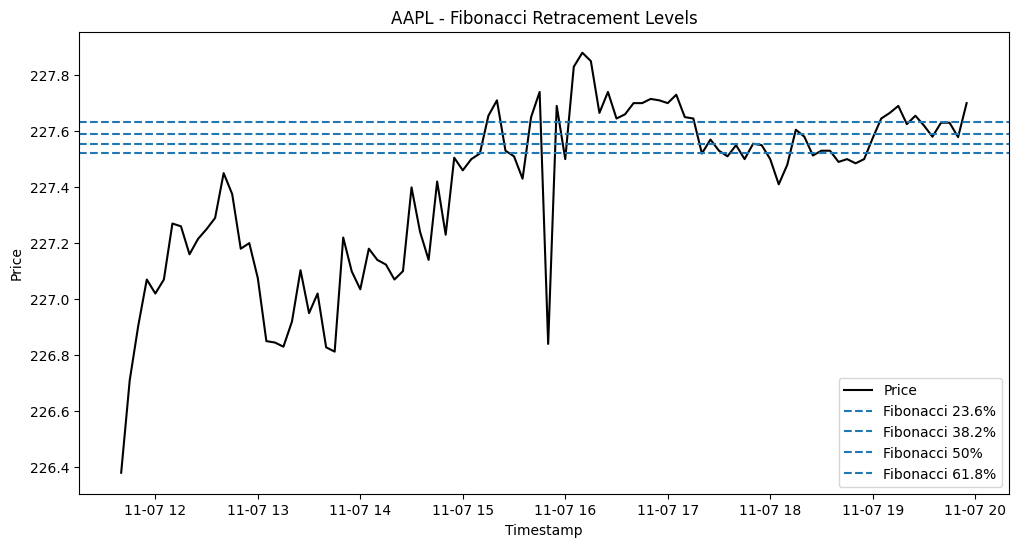

Price is approaching resistance. A reversal or breakout could happen.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the cleaned DataFrame with the intraday stock data

def calculate_fibonacci_levels(data, period=30):
    """Calculate Fibonacci retracement levels based on the high and low over a period."""
    max_price = data['close'].rolling(window=period).max().iloc[-1]  # Maximum close price in the window
    min_price = data['close'].rolling(window=period).min().iloc[-1]  # Minimum close price in the window
    diff = max_price - min_price

    # Fibonacci levels: 23.6%, 38.2%, 50%, 61.8%
    fib_levels = {
        '23.6%': max_price - diff * 0.236,
        '38.2%': max_price - diff * 0.382,
        '50%': max_price - diff * 0.5,
        '61.8%': max_price - diff * 0.618
    }
    
    return fib_levels

# Calculate Fibonacci levels
fib_levels = calculate_fibonacci_levels(data)

# Plot the closing prices and Fibonacci levels
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Price', color='black')

# Plot the Fibonacci levels as horizontal lines
for level, value in fib_levels.items():
    plt.axhline(value, label=f'Fibonacci {level}', linestyle='--')

# Title and labels
plt.title(f'{symbol} - Fibonacci Retracement Levels')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()

# Support/Resistance Insight based on Fibonacci levels
if data['close'].iloc[-1] > fib_levels['61.8%']:
    print("Price is approaching resistance. A reversal or breakout could happen.")
elif data['close'].iloc[-1] < fib_levels['23.6%']:
    print("Price is approaching support. A reversal or bounce could happen.")
else:
    print("Price is in a neutral zone. No immediate action.")

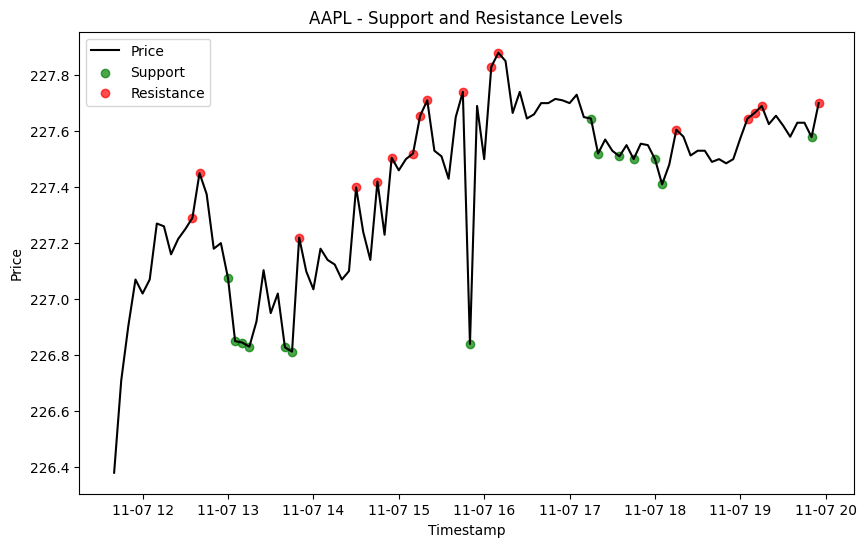

Price is approaching resistance. A reversal or breakout could happen.


In [7]:
# Identify support (local minima) and resistance (local maxima)
data['Support'] = data['close'][data['close'] == data['close'].rolling(window=10).min()]
data['Resistance'] = data['close'][data['close'] == data['close'].rolling(window=10).max()]

# Plot support and resistance
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Price', color='black')
plt.scatter(data.index, data['Support'], color='green', label='Support', marker='o', alpha=0.7)
plt.scatter(data.index, data['Resistance'], color='red', label='Resistance', marker='o', alpha=0.7)
plt.title(f'{symbol} - Support and Resistance Levels')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()

# Support/Resistance Insight
if data['close'].iloc[-1] > fib_levels['61.8%']:
    print("Price is approaching resistance. A reversal or breakout could happen.")
elif data['close'].iloc[-1] < fib_levels['23.6%']:
    print("Price is approaching support. A reversal or bounce could happen.")
else:
    print("Price is in a neutral zone. No immediate action.")


Report Generation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is the cleaned DataFrame with the intraday stock data

# Calculate short-term (5-period) and long-term (30-period) moving averages
data['MA_5'] = data['close'].rolling(window=5).mean()
data['MA_30'] = data['close'].rolling(window=30).mean()

# Calculate returns (percentage change in closing prices)
data['returns'] = data['close'].pct_change()

# Function to calculate RSI
def compute_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate Fibonacci retracement levels
def calculate_fibonacci_levels(data, period=30):
    max_price = data['close'].rolling(window=period).max().iloc[-1]
    min_price = data['close'].rolling(window=period).min().iloc[-1]
    diff = max_price - min_price
    fib_levels = {
        '23.6%': max_price - diff * 0.236,
        '38.2%': max_price - diff * 0.382,
        '50%': max_price - diff * 0.5,
        '61.8%': max_price - diff * 0.618
    }
    return fib_levels

# Function to generate the investment report
def generate_investment_report(data, symbol):
    print(f"\nInvestment Report for {symbol}")
    print("--------------------------------------------------")
    
    # Moving Average Insights
    if data['MA_5'].iloc[-1] > data['MA_30'].iloc[-1]:
        print("Bullish Signal: Golden Cross (Short-term MA is above Long-term MA)")
    else:
        print("Bearish Signal: Death Cross (Short-term MA is below Long-term MA)")
    
    # Volatility Insights
    volatility = data['returns'].std() * np.sqrt(5)  # Annualized volatility approximation (5 trading days/week)
    print(f"Estimated Volatility (5-minute returns): {volatility:.4f}")
    if volatility > 0.01:
        print("High Volatility: Consider a conservative strategy or lower exposure to this stock.")
    else:
        print("Low Volatility: Suitable for stable long-term growth.")
    
    # RSI Insights
    rsi_value = compute_rsi(data).iloc[-1]
    print(f"RSI: {rsi_value:.2f} - {'Overbought' if rsi_value > 70 else 'Oversold' if rsi_value < 30 else 'Neutral'}")
    if rsi_value > 70:
        print(f"RSI ({rsi_value:.2f}) indicates an Overbought condition. Consider selling or holding off.")
    elif rsi_value < 30:
        print(f"RSI ({rsi_value:.2f}) indicates an Oversold condition. Consider buying.")
    else:
        print(f"RSI ({rsi_value:.2f}) is neutral. No immediate action required.")
    
    # Fibonacci Levels Insights
    fib_levels = calculate_fibonacci_levels(data)
    print("\nFibonacci Retracement Levels:")
    for level, value in fib_levels.items():
        print(f"{level}: {value:.2f}")
    
    if data['close'].iloc[-1] > fib_levels['61.8%']:
        print("Price is approaching resistance. A reversal or breakout could happen. Consider selling or reducing exposure.")
    elif data['close'].iloc[-1] < fib_levels['23.6%']:
        print("Price is approaching support. A reversal or bounce could happen. Consider buying or increasing exposure.")
    else:
        print("Price is in a neutral zone. No immediate action required.")
    
    # Support and Resistance Insights
    data['Support'] = data['close'][data['close'] == data['close'].rolling(window=10).min()]
    data['Resistance'] = data['close'][data['close'] == data['close'].rolling(window=10).max()]
    print("\nSupport and Resistance Levels:")
    print(f"Support: {data['Support'].iloc[-1]:.2f}, Resistance: {data['Resistance'].iloc[-1]:.2f}")
    
    if data['close'].iloc[-1] > data['Resistance'].iloc[-1]:
        print("Price is approaching resistance. A reversal or breakout could happen.")
    elif data['close'].iloc[-1] < data['Support'].iloc[-1]:
        print("Price is approaching support. A reversal or bounce could happen.")
    else:
        print("Price is in a neutral zone. No immediate action required.")
    
    # Suggest portfolio diversification based on volatility and MA signal
    diversification_plan(volatility, data['MA_5'].iloc[-1] > data['MA_30'].iloc[-1])

# Function to suggest portfolio diversification based on volatility and moving average signal
def diversification_plan(volatility, ma_signal):
    if volatility > 0.01:
        print("Portfolio Diversification Recommendation: Due to high volatility, diversify your portfolio across safer assets.")
    else:
        if ma_signal:
            print("Portfolio Diversification Recommendation: Focus on stocks with strong momentum or growth potential.")
        else:
            print("Portfolio Diversification Recommendation: Consider defensive stocks or bonds in a bearish trend.")

# Example usage of the function with the symbol 'AAPL' and the data (which should be pre-loaded):
symbol = 'AAPL'
generate_investment_report(data, symbol)


Investment Report for AAPL
--------------------------------------------------
Bullish Signal: Golden Cross (Short-term MA is above Long-term MA)
Estimated Volatility (5-minute returns): 0.0017
Low Volatility: Suitable for stable long-term growth.
RSI: 66.31 - Neutral
RSI (66.31) is neutral. No immediate action required.

Fibonacci Retracement Levels:
23.6%: 227.63
38.2%: 227.59
50%: 227.56
61.8%: 227.52
Price is approaching resistance. A reversal or breakout could happen. Consider selling or reducing exposure.

Support and Resistance Levels:
Support: nan, Resistance: 227.70
Price is in a neutral zone. No immediate action required.
Portfolio Diversification Recommendation: Focus on stocks with strong momentum or growth potential.
